In [1]:
import numpy as np
import pandas as dp
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

For an example of usage, see
:ref:`sphx_glr_auto_examples_datasets_plot_random_dataset.py`.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or array-like of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is 

**make_blobs -> Return array of points that are random.**

In [4]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 0)

**2 feature -> 2D state**
**, 3 feature -> 3D state** 

In [5]:
# X

In [6]:
X.shape  # As given by us

(500, 2)

**random_state = 0, means  everytime random number will not generate. Points location will remain same, not randomly generated.**

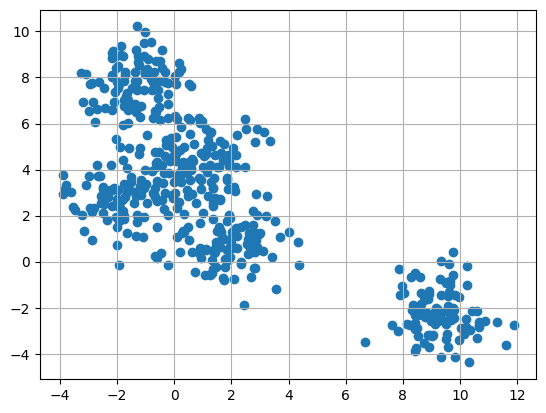

In [7]:
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

**We can see different Clusters**

In [8]:
k = 4

color = ['orange', 'green', 'blue', 'yellow', 'red']

clusters = {}

In [9]:
# random.random will return number between 0 and 1.
# After multiplying by 2, numbers are between 0 and 2.
# Then we subtract -1.
# After multiplying by 10, range is equal to -10 to 10

In [10]:
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1], )) - 1)
    points = []
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i] = cluster

**between->0 and 1  ->   0 and 2  ->   1 to 1    -> -10 to 10**

In [11]:
# For every k, a center is made, a list is made where all points are store and a dictionary is made where all these things are mapped (cluster). 

In [12]:
clusters

{0: {'center': array([ 7.61095223, -1.46738816]),
  'points': [],
  'color': 'orange'},
 1: {'center': array([-2.89896615, -2.6787814 ]),
  'points': [],
  'color': 'green'},
 2: {'center': array([ 8.26651432, -9.40928821]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-4.22210529,  1.53046703]),
  'points': [],
  'color': 'yellow'}}

In [13]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [14]:
def assign_points_to_cluster(clusters, X):
    for ix in range(X.shape[0]):
        dist = []  # initialising an empty list every time. Distance of every point from centroid.
        curr_x = X[ix] # will store the current point location. 
        for kx in range(k): 
            d = distance(curr_x, clusters[kx]['center']) # getting distance from each and every centroid of that current_X
            dist.append(d) # It will get appended in the list.
        current_cluster = np.argmin(dist) # return index of minimum value
        clusters[current_cluster]['points'].append(curr_x) # Append the point inside the list in the cluster

**Working->**

In [15]:

# ix = 10
# dist = [2,1,6,8]
# curr = (2,3)

# kx = (1,4) (2,4) (5,5) (6,7)
# d = #2 
#     #1
#     #6
#     8                 Distances of point from the 4 centroid get store in dist array
# current cluster = 1   Minimum index of the point we get from argmin 
#                       After appending it to the cluster, it will get added to the point array.

# cluster[1][points].append()

In [16]:
def update_position_of_Cluster(clusters):
    
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_center = pts.mean(axis = 0)
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = []

**Working->**

In [17]:
# 0 (4,7) Updating the new mean
# pts = [(1,1),(3,5),(5,6)]
# new center pts.mean == (3,4) # Will update the (4,7) to (3,4)

In [18]:
def plot_points(clusters):
    for kx in range (k):
        pts = np.array(clusters[kx]['points'])

        # Implementing Error Handling
        try:
            plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
        except:
            pass
        # this is to plot the centers in the scatter plot

        uk = clusters[kx]['center']
        plt.scatter(uk[0], uk[1], color = 'black', marker = '*')
        

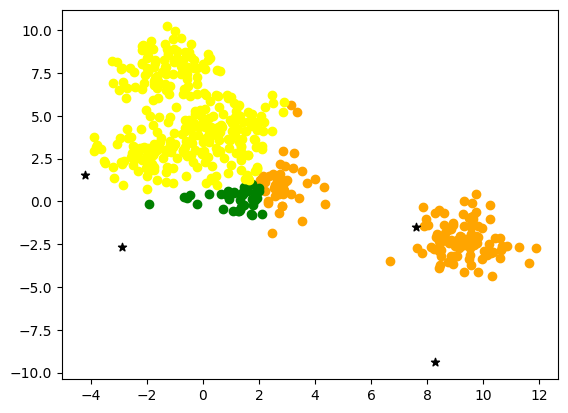

In [19]:
assign_points_to_cluster(clusters, X)
plot_points(clusters)

In [20]:
# Manually updating the Position of Cluster
# update_position_of_Cluster(clusters)

In [21]:
for i in range(100):
    update_position_of_Cluster(clusters)
    assign_points_to_cluster(clusters, X)

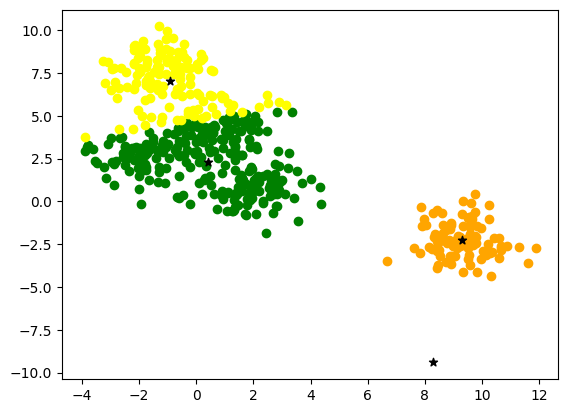

In [22]:
plot_points(clusters)